Transformation

What it does:
Changes the shape/distribution of the data to make it more suitable for modeling.

Goal:
Reduce skewness, make data closer to normal distribution, stabilize variance.

Examples:

Box-Cox (positive data only)

Yeo-Johnson (handles negatives too)

Log, sqrt, power transforms

Think of it like:
Stretching/squeezing the curve so it looks more like a bell curve instead of skewed.

Transformation is used only when data is skewed and you need to normalize it for algorithms that assume normality (like linear regression, ANOVA, etc.).

In [18]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#lets create a not normally distributed data
np.random.seed(0)
data = np.random.exponential(size=1000, scale=2)

#change the column name to values
data = {'values': data}
df = pd.DataFrame(data)
df

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
995,0.205564
996,1.446892
997,5.574577
998,0.519217


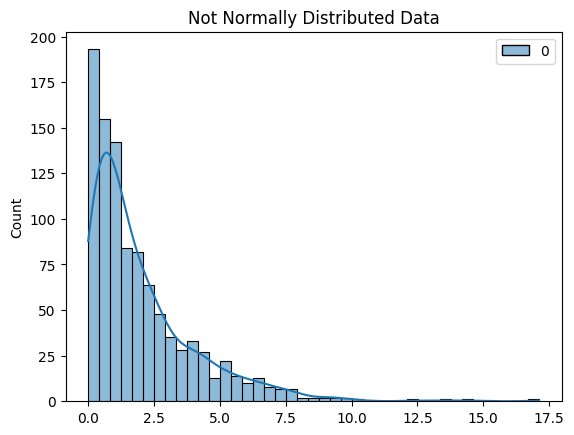

In [ ]:
#lets visulaize the not normally distributed data
sns.histplot(df, kde=True)
plt.title('Not Normally Distributed Data')
plt.show()

#as u can see in the plot below the data is not normally distributed its skewed to the right

In [ ]:
#lets tranform the data to make it normally distributed
pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo = PowerTransformer(method='yeo-johnson')
pt_quantile = QuantileTransformer(output_distribution='normal')

#for box cox method the data should be positive
df['box-cox'] = pt_boxcox.fit_transform(df[['values']])  # Adding 1 to make all values positive

#for yeo johnson method the data can be negative as well
df['yeo-johnson'] = pt_yeo.fit_transform(df[['values']])

#for quantile transformer method the data can be negative as well
df['quantile'] = pt_quantile.fit_transform(df[['values']]) #Quantile transformer is the best one to make the data normally distributed


df.head()


,values,box-cox,yeo-johnson,quantile
0,1.591749,0.158969,0.179335,0.162552
1,2.511862,0.602906,0.677331,0.587964
2,1.846446,0.298068,0.339698,0.286135
3,1.574402,0.148897,0.167607,0.157469
4,1.102097,-0.164776,-0.202107,-0.154930


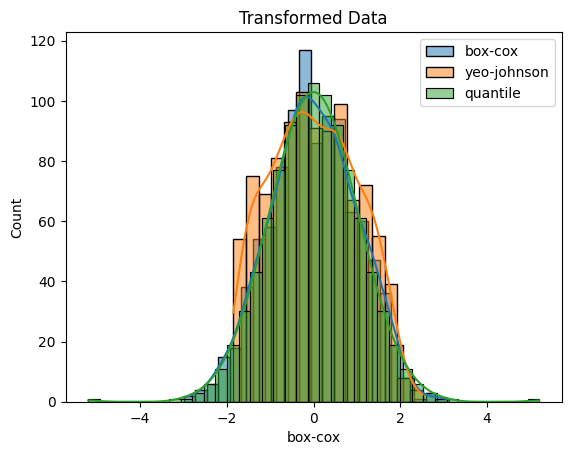

In [21]:
#lets plot the data after transformation
for col in ['box-cox', 'yeo-johnson', 'quantile']:
    sns.histplot(df[col], kde=True, label=col)
    
plt.title('Transformed Data')
plt.legend()
plt.show()